In [47]:
import pandas as pd
import numpy as np

In [48]:
#leo el dataframe de datos, específicando el delimitador
df=pd.read_csv("countries_gdp_hist.csv",";")

/tmp/ipykernel_1026/1424618869.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df=pd.read_csv("countries_gdp_hist.csv",";")


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13330 entries, 0 to 13329
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country_code         13330 non-null  object 
 1   region_name          13330 non-null  object 
 2   sub_region_name      13330 non-null  object 
 3   intermediate_region  13330 non-null  object 
 4   country_name         13330 non-null  object 
 5   income_group         13330 non-null  object 
 6   year                 13330 non-null  int64  
 7   total_gdp            13330 non-null  float64
 8   total_gdp_million    13330 non-null  float64
 9   gdp_variation        13330 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 1.0+ MB


In [50]:
df.describe()

,year,total_gdp,total_gdp_million,gdp_variation
count,13330.000000,1.333000e+04,1.333000e+04,13330.000000
mean,1990.500000,1.429386e+11,1.429386e+05,2.688196
std,17.896201,8.769979e+11,8.769979e+05,5.675320
min,1960.000000,0.000000e+00,0.000000e+00,-64.047107
25%,1975.000000,1.152238e+08,1.152238e+02,0.000000
50%,1990.500000,3.189443e+09,3.189443e+03,2.024117
75%,2006.000000,2.746324e+10,2.746324e+04,5.271668
max,2021.000000,2.331508e+13,2.331508e+07,149.972963


In [51]:
df["region_name"].value_counts()

Africa      3348
Asia        3100
Americas    2852
Europe      2852
Oceania     1178
Name: region_name, dtype: int64

In [52]:
info_year=df["year"].value_counts().sort_values()
print(info_year)
print(info_year.shape)


1960    215
1989    215
1962    215
1963    215
1964    215
       ... 
2017    215
2018    215
2019    215
2007    215
2021    215
Name: year, Length: 62, dtype: int64
(62,)


Por tanto ya se que tengo información de 62 años distintos, desde 1960 hasta 2021

In [53]:
df

,country_code,region_name,sub_region_name,intermediate_region,country_name,income_group,year,total_gdp,total_gdp_million,gdp_variation
0,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1960,0.000000e+00,0.000000,0.000000
1,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1961,0.000000e+00,0.000000,0.000000
2,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1962,0.000000e+00,0.000000,0.000000
3,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1963,0.000000e+00,0.000000,0.000000
4,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1964,0.000000e+00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
13325,ZWE,Africa,Sub-Saharan Africa,Eastern Africa,Zimbabwe,Países de ingreso mediano bajo,2017,1.758489e+10,17584.890937,4.080264
13326,ZWE,Africa,Sub-Saharan Africa,Eastern Africa,Zimbabwe,Países de ingreso mediano bajo,2018,3.415607e+10,34156.069918,5.009867
13327,ZWE,Africa,Sub-Saharan Africa,Eastern Africa,Zimbabwe,Países de ingreso mediano bajo,2019,2.183223e+10,21832.234926,-6.332446
13328,ZWE,Africa,Sub-Saharan Africa,Eastern Africa,Zimbabwe,Países de ingreso mediano bajo,2020,2.150970e+10,21509.698406,-7.816951


In [54]:
df_region=df.pivot_table(index="year",columns="region_name",values="total_gdp_million",aggfunc="sum")
df_region

region_name,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1960,3.232544e+04,6.431076e+05,1.936713e+05,2.645978e+05,2.443435e+04
1961,3.329481e+04,6.671331e+05,1.914909e+05,2.879909e+05,2.571382e+04
1962,3.558911e+04,7.406900e+05,1.980220e+05,3.141676e+05,2.638319e+04
1963,4.103769e+04,7.788222e+05,2.223068e+05,3.466600e+05,2.858317e+04
1964,4.073663e+04,8.407136e+05,2.551125e+05,3.837123e+05,3.151947e+04
...,...,...,...,...,...
2017,2.335056e+06,2.668941e+07,2.945670e+07,2.041321e+07,1.589331e+06
2018,2.441884e+06,2.769877e+07,3.164637e+07,2.201554e+07,1.699083e+06
2019,2.506481e+06,2.848210e+07,3.227199e+07,2.173347e+07,1.664785e+06


### Visualización

In [55]:
import matplotlib.pyplot as  plt
import numpy as np
import seaborn as sns

In [56]:
mayor_año=df["year"]>1980
mayor_año

0        False
1        False
2        False
3        False
4        False
         ...  
13325     True
13326     True
13327     True
13328     True
13329     True
Name: year, Length: 13330, dtype: bool

In [57]:
#Se filtrara solo a años del 2000 en adelante
df2=df[mayor_año]
#Se filtrará solo a los datos de Aruba
pais_filter=df2["country_name"]=="Colombia"
pais_filter

21       False
22       False
23       False
24       False
25       False
         ...  
13325    False
13326    False
13327    False
13328    False
13329    False
Name: country_name, Length: 8815, dtype: bool

In [58]:
df3=df2[pais_filter]
df3.head()

,country_code,region_name,sub_region_name,intermediate_region,country_name,income_group,year,total_gdp,total_gdp_million,gdp_variation
2501,COL,Americas,Latin America and the Caribbean,South America,Colombia,Ingreso mediano alto,1981,3.638837e+10,36388.366869,2.276873
2502,COL,Americas,Latin America and the Caribbean,South America,Colombia,Ingreso mediano alto,1982,3.896804e+10,38968.039722,0.948421
2503,COL,Americas,Latin America and the Caribbean,South America,Colombia,Ingreso mediano alto,1983,3.872982e+10,38729.822782,1.573956
2504,COL,Americas,Latin America and the Caribbean,South America,Colombia,Ingreso mediano alto,1984,3.825312e+10,38253.120738,3.350684
2505,COL,Americas,Latin America and the Caribbean,South America,Colombia,Ingreso mediano alto,1985,3.489441e+10,34894.411352,3.107106


<AxesSubplot: xlabel='year', ylabel='total_gdp_million'>

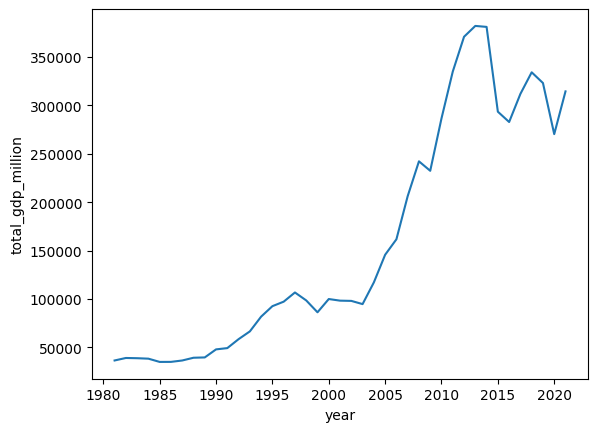

In [59]:
#Así logro obtener una grafica del GDP de aruba desde un año determinado en adelante
sns.lineplot(data=df3,x="year",y="total_gdp_million")

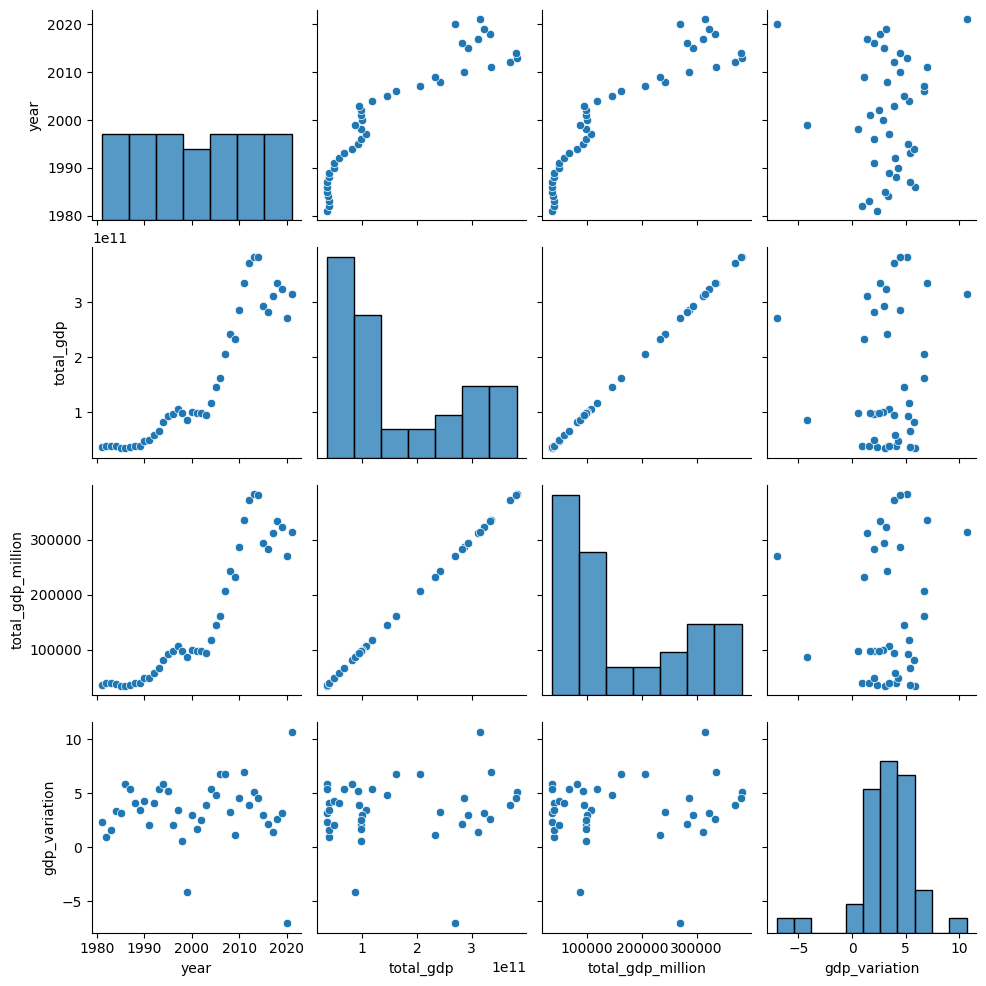

In [60]:
sns.pairplot(df3)